In [1]:
import gudhi 
import numpy as np
import networkx as nx

In [2]:
def PrintSimplices(simpcomplex):
    '''
    Print a list of the simplices of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        PrintSimplices(simpcomplex)
    '''
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")
        
def DrawSimplicialComplex(simpcomplex, pos=None):
    '''
    Draw the 1-skeleton of the simplicial complex 'simpcomplex', in the plane.
    If 'pos==None', the position of the vertices are chosen at random, according to the 'spring_layout' of networkx.
    If pos is a dict 
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        pos: a dict {(vertex of simpcomplex): (list of floats of length 2) }
        
    Example 1:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        DrawSimplicialComplex(simpcomplex)

    Example 2:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        pos = {0:[0,0], 1:[0,1]}
        DrawSimplicialComplex(simpcomplex, pos=pos)
    '''
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')
    
def NumberOfConnectedComponents(simpcomplex, verbose = 'True'):
    '''
    Print the number of connected components of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        NumberOfConnectedComponents(simpcomplex)
    '''    
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    if verbose: print('The simplicial complex admits '+repr(nbr_components)+' connected component(s).')
    return nbr_components

def EulerCharacteristic(simpcomplex, verbose = 'True'):
    '''
    Print the Euler characteristic of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        EulerCharacteristic(simpcomplex)
    '''
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

## Triangulation of the circle

We start by considering a simplicial complex $S$ that is a triangulation of the circle.
It is given by:
- three vertices: $0$,$1$ and $2$,
- three edges: $[0,1]$, $[1,2]$ and $[2,0]$.


In [3]:
# We build a SimplexTree structure on gudhi

simpcomplex = gudhi.SimplexTree()
print(simpcomplex)

In [4]:
# We add the vertices

simpcomplex.insert([0])
simpcomplex.insert([1])
simpcomplex.insert([2])

True

In [5]:
# Let us verify that the vertices are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]


In [6]:
# We add the edges

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])

True

In [7]:
# Let us verify that the edges are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


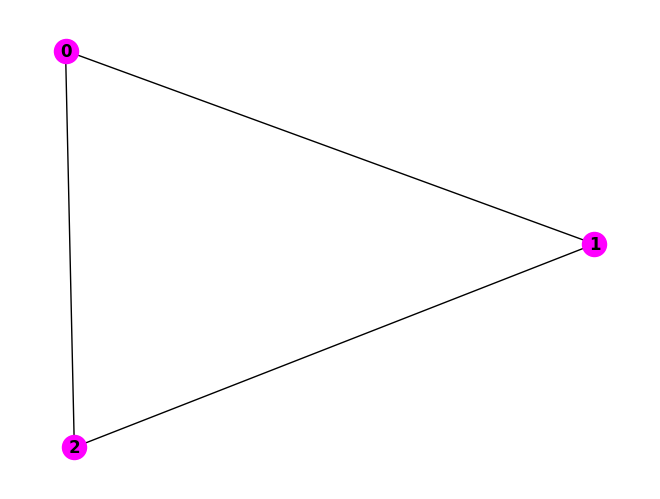

In [8]:
# The following function allows to draw the simplicial complex (uses the library networkx)

DrawSimplicialComplex(simpcomplex)

In [9]:
# In Gudhi, if a simplex is added to the complex, then all its faces are
# Hence we can use the simpler code:

simpcomplex2 = gudhi.SimplexTree()

simpcomplex2.insert([0,1])
simpcomplex2.insert([1,2])
simpcomplex2.insert([2,0])

PrintSimplices(simpcomplex2)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [10]:
# We can do it even faster, by using the remove_maximal_simplex function:

simpcomplex3 = gudhi.SimplexTree()

simpcomplex3.insert([0,1,2])
simpcomplex3.remove_maximal_simplex([0,1,2])

PrintSimplices(simpcomplex3)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [11]:
# be careful

#simpcomplex3.remove_maximal_simplex([0])

## Computing topological invariants

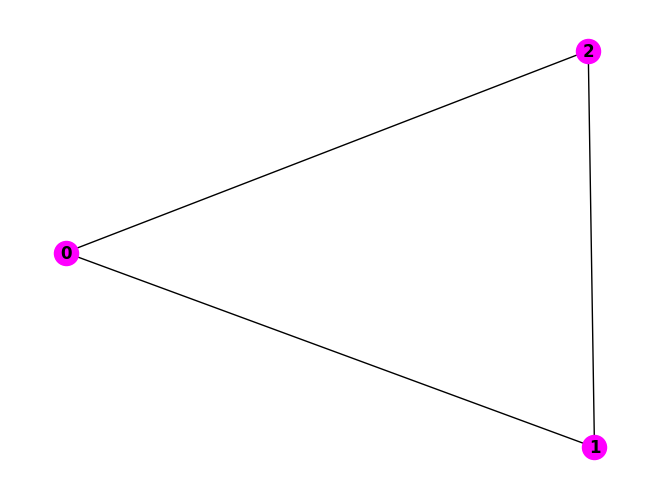

In [12]:
simpcomplexdim2 = gudhi.SimplexTree()

simpcomplexdim2.insert([0,1,2])

DrawSimplicialComplex(simpcomplexdim2)

In [13]:
# The following function returns the number of connected components of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

NumberOfConnectedComponents(simpcomplex, verbose = False)

1

In [14]:
# The following function returns the Euler characteristic of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


0

# Exercise 22

Build triangulations of the alphabet letters, and compute their Euler characteristic.

Given two letters that are homotopy equivalent, is it true thar their Euler characteristic are equal?
Given two letters that are not homotopy equivalent, is it true thar their Euler characteristic are different?

The homeomorphism classes of the alphabet letters are : **{A,R}, {B}, {C,G,I,J,L,M,N,S,U,V,W,Z}, {D,O}, {E,F,T,Y}, {H,K}, {P}, {Q}, {X}**

The homotopic classes of the alphabet letters are : **{A,D,O,P,Q,R}, {C,E,F,G,H,I,J,K,L,M,N,S,T,U,V,W,X,Y,Z}, {B}**

### Triangulation of the homeomorphic class A, R 

The simplicial complex has Euler characteristic equal to 0.


0

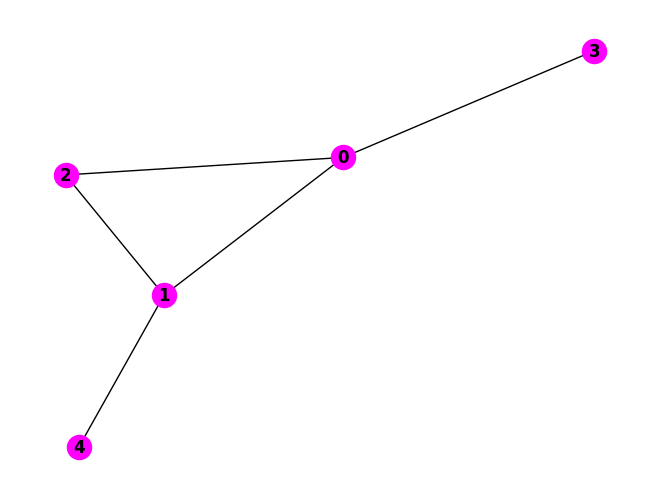

In [15]:
# Triangulation of the homeomorphic class A, R 

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])
simpcomplex.insert([3,0])
simpcomplex.insert([4,1])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

### Triangulation of the homeomorphic class B


The simplicial complex has Euler characteristic equal to -1.


-1

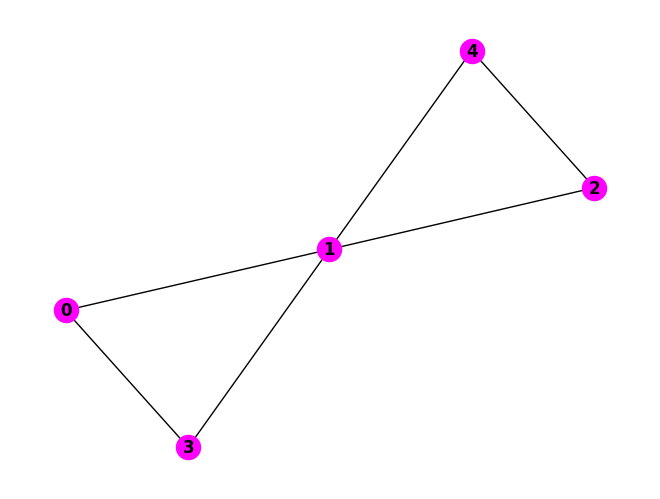

In [16]:
# We build a triangulation of the letter B

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,3])
simpcomplex.insert([1,2])
simpcomplex.insert([1,3])
simpcomplex.insert([1,4])
simpcomplex.insert([2,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

### Triangulation of the homeomorphic class C,G,I,J,L,M,N,S,U,V,W,Z

The simplicial complex has Euler characteristic equal to 1.


1

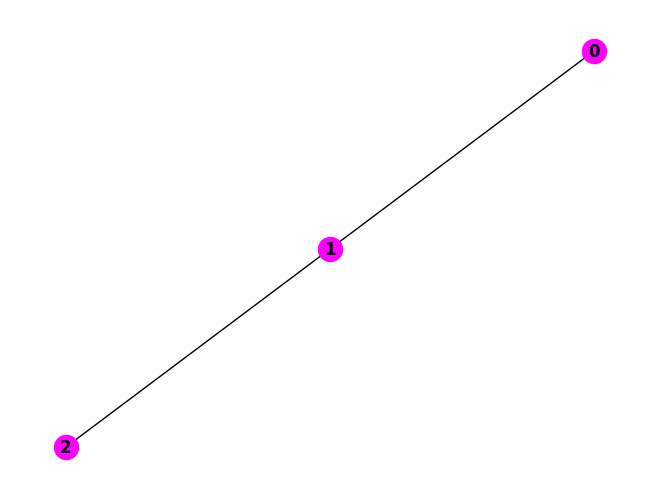

In [17]:
# We build a triangulation of the letter C

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

### Triangulation of the homeomorphic class D,O

The simplicial complex has Euler characteristic equal to 0.


0

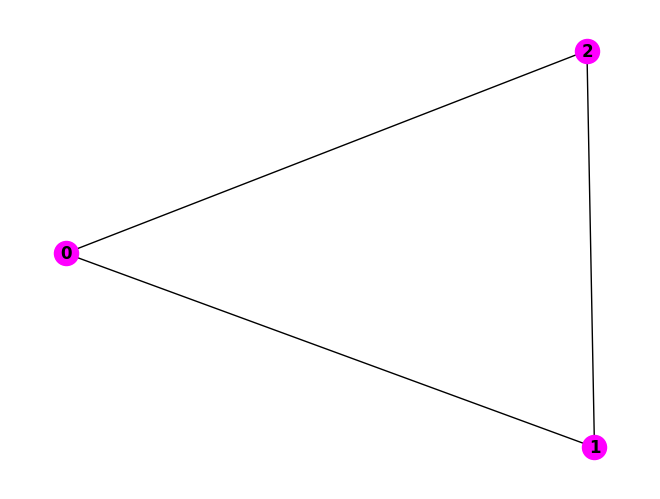

In [18]:
# We build a triangulation of the letter D

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,2])
simpcomplex.insert([1,2])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

### Triangulation of the homeomorphic class E,F,T,Y


The simplicial complex has Euler characteristic equal to 1.


1

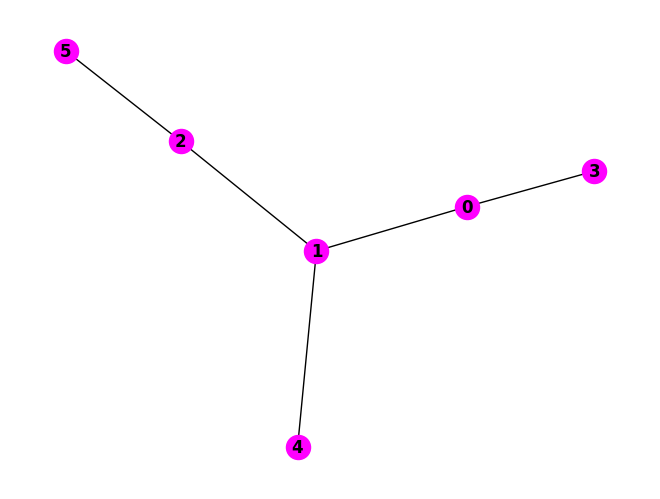

In [19]:
# We build a triangulation of the letter E

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([0,3])
simpcomplex.insert([1,2])
simpcomplex.insert([1,4])
simpcomplex.insert([2,5])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

### Triangulation of the homeomorphic class H,K

The simplicial complex has Euler characteristic equal to 1.


1

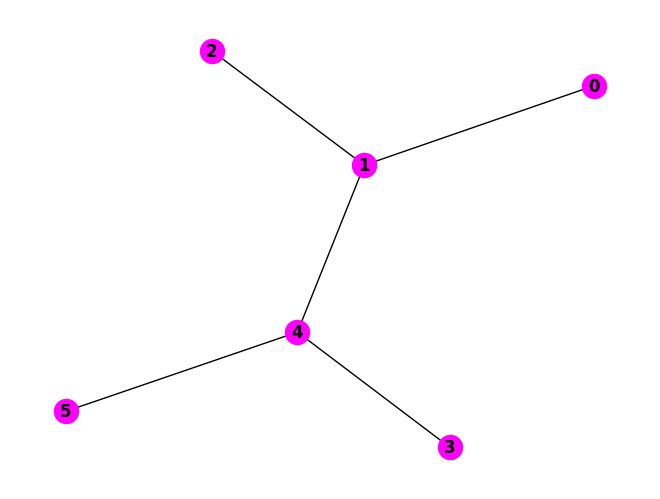

In [20]:
# We build a triangulation of the letter H

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([1,4])
simpcomplex.insert([3,4])
simpcomplex.insert([4,5])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

### Triangulation of the homeomorphic class P

The simplicial complex has Euler characteristic equal to 0.


0

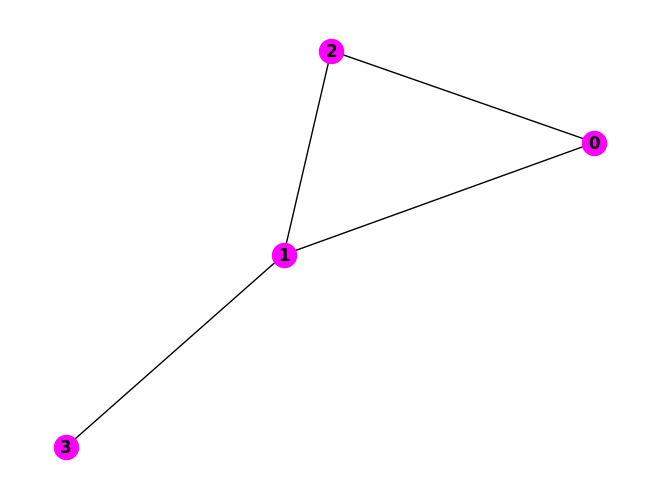

In [21]:
# We build a triangulation of the letter P

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])
simpcomplex.insert([1,3])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

### Triangulation of the homeomorphic class Q

The simplicial complex has Euler characteristic equal to 0.


0

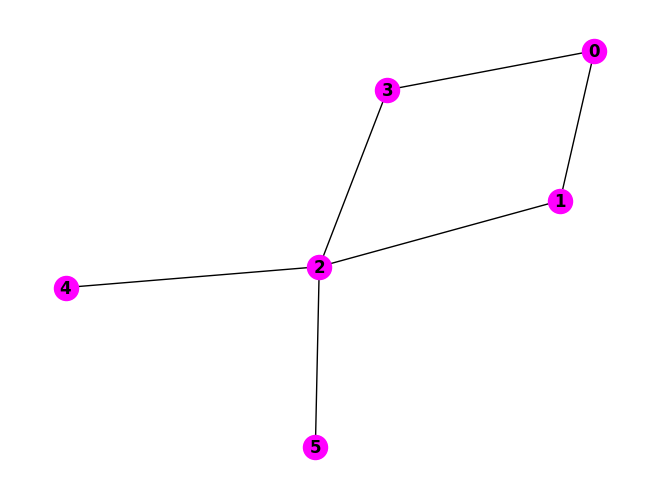

In [22]:
# We build a triangulation of the letter Q

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,3])
simpcomplex.insert([3,0])
simpcomplex.insert([2,4])
simpcomplex.insert([2,5])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

### Triangulation of the homeomorphic class X

The simplicial complex has Euler characteristic equal to 1.


1

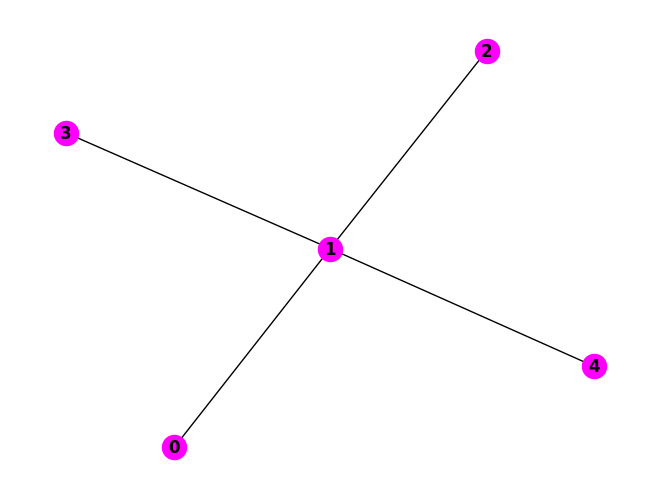

In [23]:
# We build a triangulation of the letter X

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([1,3])
simpcomplex.insert([1,4])

DrawSimplicialComplex(simpcomplex)
EulerCharacteristic(simpcomplex)

The homeomorphism classes of the alphabet letters are : **{A,R}, {B}, {C,G,I,J,L,M,N,S,U,V,W,Z}, {D,O}, {E,F,T,Y}, {H,K}, {P}, {Q}, {X}**

The homotopic classes of the alphabet letters are : **{A,D,O,P,Q,R}, {C,E,F,G,H,I,J,K,L,M,N,S,T,U,V,W,X,Y,Z}, {B}**

### Given two letters that are homotopy equivalent, is it true that their Euler characteristic are equal?

- We have A and O in the same homotopic class and the Euler characteristic of A is 0 and O is 0
- We have C and X in the same homotopic class and the Euler characteristic of C is 1 and X is 1
- We have P and R in the same homotopic class and the Euler characteristic of P is 0 and R is 0
- We have M and L in the same homotopic class and the Euler characteristic of M is 1 and L is 1

**Conclusion** : Yes, Given two letters that are homotopy equivalent, their Euler characteristic are equal.

So, two classes are homeomorphic equivalent implies there are homotopic equivalent.




### Given two letters that are not homotopy equivalent, is it true thar their Euler characteristic are different?

- We have D and F in the same homotopic class and the Euler characteristic of D is 0 and X is 1
- We have B and L in the same homotopic class and the Euler characteristic of B is -1 and L is 1
- We have A and G in the same homotopic class and the Euler characteristic of A is 0 and G is 1
- We have Q and M in the same homotopic class and the Euler characteristic of Q is 0 and M is 1

  
**Conclusion** : Yes, Given two letters that are not homotopy equivalent, their Euler characteristic are different.

So, two classes are homeomorphic equivalent implies there are not necessary homotopic equivalent.

# Exercise 23

For every $n$, triangulate the bouquet of $n$ circles. Compute their Euler characteristic. 

In [24]:
def bouquet_circle(n: int): 
    
    simpcomplex = gudhi.SimplexTree()
    
    for i in range(n): 
         
        simpcomplex.insert([0,2*i+1])
        simpcomplex.insert([0,2*i + 2])
        simpcomplex.insert([2*i+1,2*i+2])
        

    return simpcomplex

Enter the number of circles:  5


The simplicial complex has Euler characteristic equal to -4.


-4

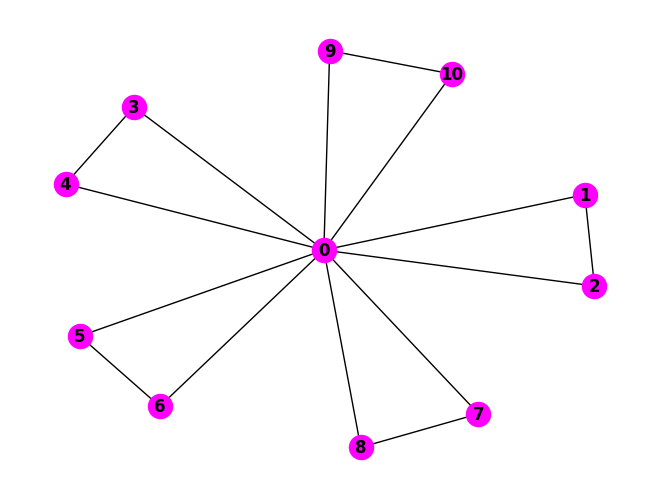

In [25]:
n = int(input("Enter the number of circles: "))

bouquet_circles = bouquet_circle(n)

DrawSimplicialComplex(bouquet_circles)
EulerCharacteristic(bouquet_circles)


# Exercise 24

Implement the triangulation of the torus given in the notes.
Compute its Euler characteristic.

The simplicial complex has Euler characteristic equal to 0.


0

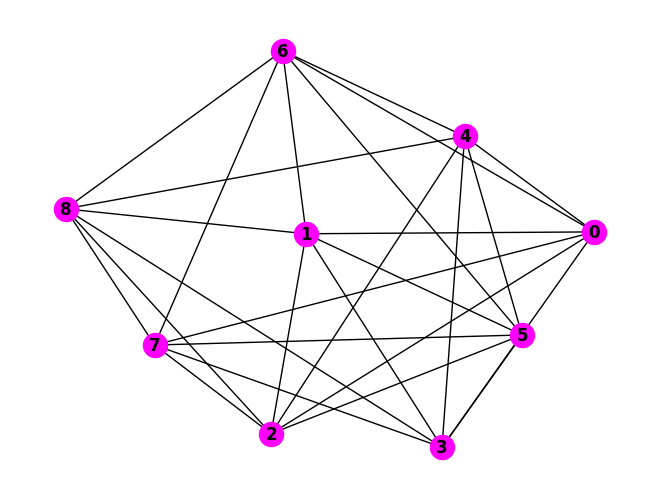

In [26]:
torus = gudhi.SimplexTree()

torus.insert([0,3,7])
torus.insert([0,2,7])
torus.insert([2,7,5])
torus.insert([2,1,5])
torus.insert([1,5,3])
torus.insert([1,0,3])

torus.insert([3,4,8])
torus.insert([3,7,8])
torus.insert([7,8,6])
torus.insert([7,5,6])
torus.insert([5,6,4])
torus.insert([5,4,3])

torus.insert([4,0,2])
torus.insert([4,2,8])
torus.insert([8,2,1])
torus.insert([8,1,6])
torus.insert([6,1,0])
torus.insert([6,4,0])

DrawSimplicialComplex(torus)
EulerCharacteristic(torus)

# Exercise 25

Consider the following dataset of $30$ points $x_0, ..., x_{29}$ in $\mathbb{R}^2$:
 ``` 
 {0: [0.29409772548731694, 0.6646626625013836],
 1: [0.01625840776679577, 0.1676405753593595],
 2: [0.15988905150272759, 0.6411323760808338],
 3: [0.9073191075894482, -0.16417982219713312],
 4: [-0.18661467838673884, 0.31618948583046413],
 5: [-0.3664040542098381, 0.9098590694955988],
 6: [-0.43753448716144905, -0.8820102274699417],
 7: [0.4096730199915961, -0.23801426675264126],
 8: [0.5903822103474676, -0.7285102954232894],
 9: [0.9133851839417766, -0.6606557328320093],
 10: [-0.15516122940597588, 0.7565411235103017],
 11: [-0.38626186295039866, -0.3662321656058476],
 12: [0.005209710070218199, 0.27655964872153116],
 13: [0.670078068894711, -0.00932202688834849],
 14: [-0.011268465716772091, 0.24340880308017376],
 15: [-0.6441978411451603, -0.9672635759413206],
 16: [-0.2841794022401025, -0.6734801188906114],
 17: [-0.15473260248990717, -0.1365357396855129],
 18: [0.7177096105982121, 0.9378197891592468],
 19: [-0.4677068504994166, 0.1533930130294956],
 20: [-0.32379909116817096, 0.9694800649768063],
 21: [-0.2886940472879451, -0.039544695812395725],
 22: [-0.5900701743351606, 0.8350804500575086],
 23: [0.14931959728335853, 0.869106793774487],
 24: [-0.14500672678238824, -0.3170082291070364],
 25: [0.07324547392476122, 0.6653572287065117],
 26: [-0.662990048258566, 0.1908198608241125],
 27: [-0.25641262456436276, -0.9844196180941553],
 28: [-0.5105685407819842, -0.4236604017060557],
 29: [0.6792549581008038, -0.026215820387260003]}
 ``` 
 
 Write a function that takes as an input a parameter $r\geq 0$, and returns the simplicial complex $\mathcal{G}(r)$ defined as follows:
- the vertices of $\mathcal{G}(r)$ are the points $x_0, ..., x_{29}$,
- for all $i, j \in [0,29]$ with $i\neq j$, the edge $[i,j]$ belongs to $\mathcal{G}(r)$ if and only if $||x_i-x_j||\leq r$.

Compute the number of connected components of $\mathcal{G}(r)$ for several values of $r$. What do you observe?

In [27]:
dataset = {0: [0.29409772548731694, 0.6646626625013836],
          1: [0.01625840776679577, 0.1676405753593595],
          2: [0.15988905150272759, 0.6411323760808338],
          3: [0.9073191075894482, -0.16417982219713312],
          4: [-0.18661467838673884, 0.31618948583046413],
          5: [-0.3664040542098381, 0.9098590694955988],
          6: [-0.43753448716144905, -0.8820102274699417],
          7: [0.4096730199915961, -0.23801426675264126],
          8: [0.5903822103474676, -0.7285102954232894],
          9: [0.9133851839417766, -0.6606557328320093],
          10: [-0.15516122940597588, 0.7565411235103017],
          11: [-0.38626186295039866, -0.3662321656058476],
          12: [0.005209710070218199, 0.27655964872153116],
          13: [0.670078068894711, -0.00932202688834849],
          14: [-0.011268465716772091, 0.24340880308017376],
          15: [-0.6441978411451603, -0.9672635759413206],
          16: [-0.2841794022401025, -0.6734801188906114],
          17: [-0.15473260248990717, -0.1365357396855129],
          18: [0.7177096105982121, 0.9378197891592468],
          19: [-0.4677068504994166, 0.1533930130294956],
          20: [-0.32379909116817096, 0.9694800649768063],
          21: [-0.2886940472879451, -0.039544695812395725],
          22: [-0.5900701743351606, 0.8350804500575086],
          23: [0.14931959728335853, 0.869106793774487],
          24: [-0.14500672678238824, -0.3170082291070364],
          25: [0.07324547392476122, 0.6653572287065117],
          26: [-0.662990048258566, 0.1908198608241125],
          27: [-0.25641262456436276, -0.9844196180941553],
          28: [-0.5105685407819842, -0.4236604017060557],
          29: [0.6792549581008038, -0.026215820387260003]}

In [28]:
import math

def euclidean_norm(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Lists must be of the same length.")
    
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(list1, list2)))


def simplical_complex(r): 
    
    if r < 0:
        return "Enter a value >= 0"
    
    G = gudhi.SimplexTree()
    for i in range(30): 
        G.insert([i])
        for j in range(i+1, 30): 
            if euclidean_norm(dataset[i], dataset[j]) <= r**2: 
                G.insert([i,j])
    return G


In [29]:
r_values = np.linspace(0.2,1,100)
c = np.zeros(100)
for i, r in enumerate(r_values):
    G = simplical_complex(r)
    c[i] = NumberOfConnectedComponents(G)

The simplicial complex admits 28 connected component(s).
The simplicial complex admits 28 connected component(s).
The simplicial complex admits 28 connected component(s).
The simplicial complex admits 28 connected component(s).
The simplicial complex admits 28 connected component(s).
The simplicial complex admits 28 connected component(s).
The simplicial complex admits 28 connected component(s).
The simplicial complex admits 28 connected component(s).
The simplicial complex admits 28 connected component(s).
The simplicial complex admits 27 connected component(s).
The simplicial complex admits 27 connected component(s).
The simplicial complex admits 26 connected component(s).
The simplicial complex admits 26 connected component(s).
The simplicial complex admits 25 connected component(s).
The simplicial complex admits 25 connected component(s).
The simplicial complex admits 25 connected component(s).
The simplicial complex admits 25 connected component(s).
The simplicial complex admits 2

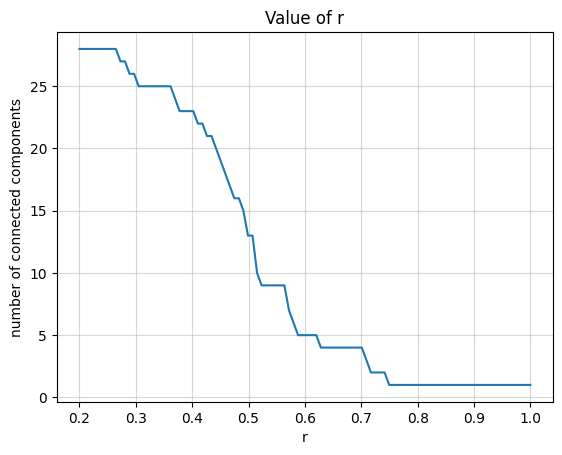

In [30]:
import matplotlib.pyplot as plt

plt.plot(r_values, c)
plt.grid(alpha = 0.5)
plt.xlabel('r')
plt.ylabel('number of connected components')
plt.title('Value of r')
plt.show()


Enter the values of r:  0.6


The simplicial complex has Euler characteristic equal to -13.
The simplicial complex admits 5 connected component(s).


5

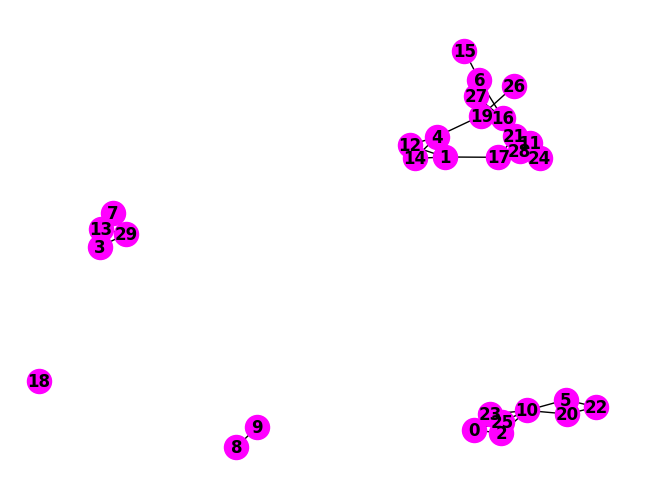

In [31]:
#Draw the simplical complex function of r

r = float(input("\nEnter the values of r: "))

G_r = simplical_complex(r)

DrawSimplicialComplex(G_r)
EulerCharacteristic(G_r)
NumberOfConnectedComponents(G_r)


**Observation**: As r increases from 0 to 1, the number of connected components decreases sharply, suggesting that higher values of r lead to more connectivity within the system.

After a certain point, the number of connected components stabilizes at a low value, indicating that the system has reached a state where most nodes are interconnected.

Around 0.75, the points become one connected component.

# Exercise 26

A *Erdős–Rényi random graph $\mathcal{G}(n,p)$* is a simplicial complex obtained as follows:
- add $n$ vertices $1,...,n$,
- add each edge $[a,b]$, where $a,b \in [1,n]$, to the complex with probability $p$.

Builds a function that, given $n$ and $p$, outputs a simplicial complex $\mathcal{G}(n,p)$.
Observe the influence of $p$ on the number of connected components of $\mathcal{G}(10,p)$ and $\mathcal{G}(100,p)$.

*Hint:* If $V$ is a list, `itertools.combinations(V,2)` can be used to generate all the non-ordered pairs `[a,b]` in `V` (package `itertools`).
The command `random.random()` can be used to generate a random number between 0 and 1, and `random.random()<p` is  `True` with probability  `p` (package `random`).

In [32]:
import itertools
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

def generate_erdos_renyi(n, p):
    """
    Generate an Erdős-Rényi random graph G(n,p)
    
    Args:
        n (int): Number of vertices
        p (float): Probability of edge creation
        
    Returns:
        dict: Adjacency list representation of the graph
    """
    # Initialize empty adjacency list
    graph = defaultdict(list)
    
    # Generate all possible vertex pairs
    vertices = range(1, n+1)
    possible_edges = list(itertools.combinations(vertices, 2))
    
    # Add edges with probability p
    for v1, v2 in possible_edges:
        if random.random() < p:
            graph[v1].append(v2)
            graph[v2].append(v1)
            
    return graph

def find_connected_components(graph, n):
    """
    Find the number of connected components in the graph using DFS
    
    Args:
        graph (dict): Adjacency list representation
        n (int): Number of vertices
        
    Returns:
        int: Number of connected components
    """
    def dfs(vertex, visited):
        visited[vertex-1] = True
        for neighbor in graph[vertex]:
            if not visited[neighbor-1]:
                dfs(neighbor, visited)
    
    visited = [False] * n
    components = 0
    
    for vertex in range(1, n+1):
        if not visited[vertex-1]:
            dfs(vertex, visited)
            components += 1
            
    return components

def analyze_components(n, p_values, trials=10):
    """
    Analyze how p affects the number of connected components
    
    Args:
        n (int): Number of vertices
        p_values (list): List of probability values to test
        trials (int): Number of trials for each p value
        
    Returns:
        list: Average number of components for each p value
    """
    avg_components = []
    
    for p in p_values:
        components = []
        for _ in range(trials):
            graph = generate_erdos_renyi(n, p)
            num_components = find_connected_components(graph, n)
            components.append(num_components)
        avg_components.append(np.mean(components))
        
    return avg_components



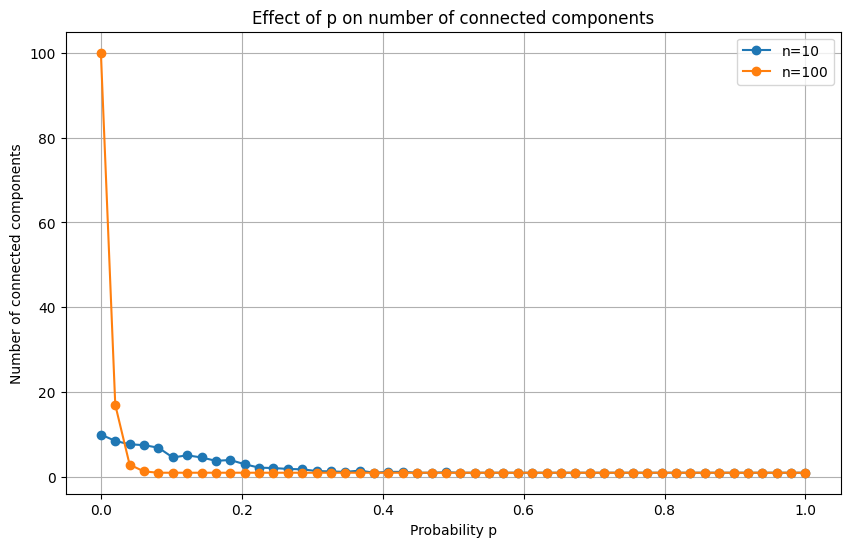

In [33]:
# Analyze both n=10 and n=100 cases
p_values = np.linspace(0, 1, 50)
n_values = [10, 100]

plt.figure(figsize=(10, 6))
for n in n_values:
    avg_components = analyze_components(n, p_values)
    plt.plot(p_values, avg_components, marker='o', label=f'n={n}')

plt.xlabel('Probability p')
plt.ylabel('Number of connected components')
plt.title('Effect of p on number of connected components')
plt.legend()
plt.grid(True)
plt.show()

**Observation** :

- For both n=10 and n=100, as p increases from 0 to around 0.5, the number of connected components decreases sharply. This suggests that higher probabilities lead to greater connectivity.

- Beyond this threshold, the number of connected components levels off, suggesting that the network has become predominantly connected independently of the value of n.

